In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2 as cv

from PIL import Image   
from tensorflow import keras  
import tensorflow.keras.layers as k

import warnings
warnings.filterwarnings("ignore")

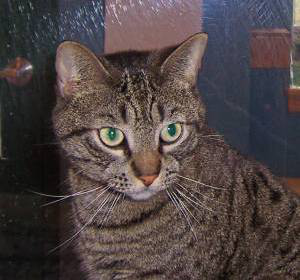

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
load_img(r"C:\Users\Admin\Desktop\J_notebook\cats_dogs(CNN)\cat_dog\cats\cat.1.jpg")

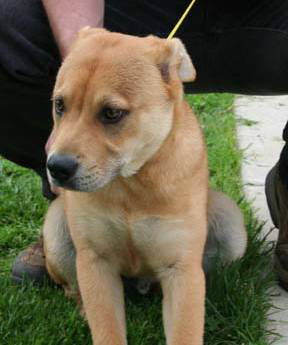

In [7]:
load_img(r"C:\Users\Admin\Desktop\J_notebook\cats_dogs(CNN)\cat_dog\dogs\dog.116.jpg")

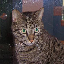

In [9]:
load_img(r"C:\Users\Admin\Desktop\J_notebook\cats_dogs(CNN)\cat_dog\cats\cat.1.jpg", target_size = (64,64))

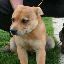

In [11]:
load_img(r"C:\Users\Admin\Desktop\J_notebook\cats_dogs(CNN)\cat_dog\dogs\dog.116.jpg", target_size = (64,64))

In [13]:
os.environ["KERAS_BACKEND"] = "tensorflow"
np.random.seed(100)

In [15]:
image_dir = (r"C:\Users\Admin\Desktop\J_notebook\cats_dogs(CNN)\cat_dog/")
size = 64
dataset = []
label = []

In [17]:
cat_img= os.listdir(image_dir + "cats/")

for i, img_name in enumerate(cat_img):
    if (img_name.split(".")[2] == "jpg"):    
        image = cv.imread(image_dir + "cats/"+img_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((size,size))   
        
        dataset.append(np.array(image))
        label.append(0)

In [18]:
print(len(dataset))

4657


In [19]:
dog_img= os.listdir(image_dir + "dogs/")

for i, img_name in enumerate(dog_img):
    if (img_name.split(".")[2] == "jpg"):    
        image = cv.imread(image_dir + "dogs/"+img_name)
        image = Image.fromarray(image,"RGB")
        image = image.resize((size,size))   
        
        dataset.append(np.array(image))
        label.append(1)

In [23]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

xtrain, xtest, ytrain, ytest = train_test_split(dataset, np.array(label), test_size = 0.2,random_state = 42)

In [24]:
INPUT_SHAPE = (size, size, 3)

inp = k.Input(shape=INPUT_SHAPE)

# Convolution(1)
conv1 = k.Conv2D(32, kernel_size=(3,3), activation="relu", padding="same")(inp)
pool1 = k.MaxPool2D(pool_size=(2,2))(conv1)
norm1 = k.BatchNormalization(axis=-1)(pool1)
drop1 = k.Dropout(rate=0.2)(norm1)

# Convolution(2)
conv2 = k.Conv2D(64, kernel_size=(3,3), activation="relu", padding="same")(drop1)
pool2 = k.MaxPool2D(pool_size=(2,2))(conv2)
norm2 = k.BatchNormalization(axis=-1)(pool2)
drop2 = k.Dropout(rate=0.3)(norm2)

# Convolution(3)
conv3 = k.Conv2D(128, kernel_size=(3,3), activation="relu", padding="same")(drop2)
pool3 = k.MaxPool2D(pool_size=(2,2))(conv3)
norm3 = k.BatchNormalization(axis=-1)(pool3)
drop3 = k.Dropout(rate=0.4)(norm3)

# Convolution(4)
conv4 = k.Conv2D(256, kernel_size=(3,3), activation="relu", padding="same")(drop3)
pool4 = k.MaxPool2D(pool_size=(2,2))(conv4)
norm4 = k.BatchNormalization(axis=-1)(pool4)
drop4 = k.Dropout(rate=0.5)(norm4)

flat = k.Flatten()(drop4)

# Hidden(1)
hidden1 = k.Dense(512, activation="relu")(flat)
norm5 = k.BatchNormalization(axis=-1)(hidden1)
drop5 = k.Dropout(rate=0.5)(norm5)

# Hidden(2)
hidden2 = k.Dense(512, activation="relu")(drop5)
norm6 = k.BatchNormalization(axis=-1)(hidden2)
drop6 = k.Dropout(rate=0.5)(norm6)

# Hidden(3)
hidden3 = k.Dense(512, activation="relu")(drop6)
norm7 = k.BatchNormalization(axis=-1)(hidden3)
drop7 = k.Dropout(rate=0.5)(norm7)

# Hidden(4)
hidden4 = k.Dense(512, activation="relu")(drop7)
norm8 = k.BatchNormalization(axis=-1)(hidden4)
drop8 = k.Dropout(rate=0.5)(norm8)

out = k.Dense(2, activation="softmax")(drop8)


In [27]:
from keras.optimizers import RMSprop, Adam
adam = Adam(learning_rate = 0.0001)
model = keras.Model(inputs = inp, outputs = out)
model.compile(optimizer = "adam",loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,285,186 (12.53 MB)

 Trainable params: 3,280,130 (12.51 MB)

 Non-trainable params: 5,056 (19.75 KB)

None


In [52]:
# history = model.fit(np.array(xtrain), ytrain, batch_size = 64, verbose = 1, epochs = 10, validation_split = 0.1, shuffle = False)

In [48]:
history = model.fit(np.array(xtrain), ytrain, batch_size = 64, verbose = 1, epochs = 20, validation_split = 0.1, shuffle = False)

Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 32s 193ms/step - accuracy: 0.8194 - loss: 0.3992 - val_accuracy: 0.7042 - val_loss: 1.1178
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 37s 221ms/step - accuracy: 0.8294 - loss: 0.3784 - val_accuracy: 0.8338 - val_loss: 0.3792
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 213ms/step - accuracy: 0.8359 - loss: 0.3711 - val_accuracy: 0.7118 - val_loss: 0.7571
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 37s 227ms/step - accuracy: 0.8483 - loss: 0.3455 - val_accuracy: 0.8286 - val_loss: 0.4323
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.8580 - loss: 0.3294 - val_accuracy: 0.7980 - val_loss: 0.5707
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - accuracy: 0.8642 - loss: 0.3161 - val_accuracy: 0.7869 - val_loss: 0.5392
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 211ms/step - accuracy: 0.8745 - loss: 0.2968 - val_accuracy: 0.8619 - val_loss: 0.3254
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 35s 212ms/step - accuracy: 0.8730 - loss: 0